# Coffee Imports and Correlations on S&P 500

In this analysis, I'll be looking at coffee imports of [countries with top GDP values](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29). I'm using data collected and organized from [Quandl](https://www.quandl.com/about). In addition, I'll be checking for any correlation with coffee imports and the S&P 500 index.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import quandl

api_key = "yourapikey"

new_list = ["US", "CH", "JA", "IN", "BR", "CA", "KS", "AS", "RS", "MX", ]
names = ["United States", "China", "Japan", "India", "Brazil", "Canada", "South Korea", 
         "Australia","Russia", "Mexico"]

## How much coffee is imported from some of the highest GDP valued nations?

Quandl's data for coffee imports is sourced from the United States Department of Agriculture's Foreign Agricultural Service (USDAFAS). Unfortunately, some areas, such as Germany or France, have no recorded data found on Quandl; so, I've went with those that are available.

In [2]:
coffee = pd.DataFrame()

for item in new_list:
    query = "USDAFAS/COFFEE_IMPORTS_" + str(item)
    df = quandl.get(query, authtoken= api_key, start_date="2002-12-31")
    df.columns = [str(item)]
 
    if coffee.empty:
        coffee = df
    else:
        coffee = coffee.join(df)

coffee.columns = names
coffee

,United States,China,Japan,India,Brazil,Canada,South Korea,Australia,Russia,Mexico
Year,,,,,,,,,,
2002-12-31,5327,NaN,NaN,50,0,NaN,NaN,NaN,NaN,0
2003-12-31,21630,224,6930,150,0,2170,1300,855,4050,175
2004-12-31,21420,299,7110,172,0,2500,1325,915,4065,164
2005-12-31,21510,300,7555,690,0,3065,1410,1010,2570,173
2006-12-31,21695,370,7275,370,0,3205,1455,1130,3585,36
2007-12-31,22600,415,7075,330,0,3570,1440,1145,4195,49
2008-12-31,22330,482,6800,490,0,3860,1610,1245,4270,670
2009-12-31,22240,475,7120,560,0,3725,1745,1340,3325,535
2010-12-31,20870,658,6790,725,0,4085,1740,1395,3945,845


Ignoring the missing values, each unit is the equivalent of a thousand 60kg (roughly 132lb) bag of coffee. That's a lot of coffee! The last two rows are predicted imported values for those years, and for most of the countries except China, they do not show any dramatic changes compared to the other years. Over the years, the imported numbers increase. For China, the USDAFAS predicts an approximate increase by 35% from the end of 2015 to the end of 2017. There are more fascinating pieces of information contained in the table. For example, I never would have guessed Japan imports more coffee than either Russia, Canada, or Australia. 

Most noticeably, among the countries listed, the United States imports the most coffee. Anyone can immediately recognize the sharp increase from the ends of 2002 to 2003. This is a percent increase of 306%. America really runs on coffee. Although, not as big a spike, the end of 2010 to 2011 shows all the countries experiencing a rise in imports. 

Another eye-grabber are those zeros from Brazil. An initial thought might be that there must be a mistake within the USDAFAS's data, but it makes reasonable sense for Brazil to have those zeros. Brazil is one of the world's biggest **exports** of coffee, so they don't require other countries for import. Still, I find it interesting that both India and Mexico, two of the largest exporters of coffee, have import values that fluctulate and eventually rise over the year (albeit still low).

Now let's fill those missing values with 0, and plot our table.

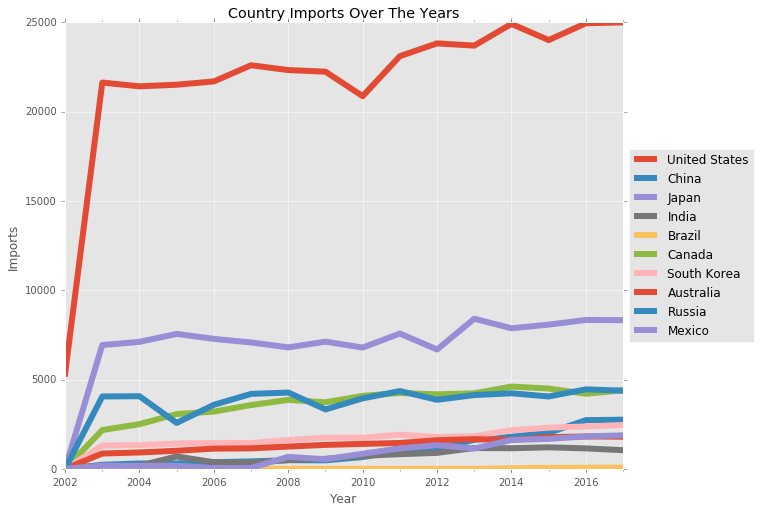

In [3]:
coffee = coffee.fillna(0)

fig = plt.figure(figsize=(10,8))

coffee.plot(ax=fig.gca(), linewidth=6.0)
plt.title('Country Imports Over The Years')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Imports')

A pretty dramatic difference in imports. It might be difficult to visualize the other countries aside from the United States. The below code can be run to plot everything besides the United States.

## What is the coffee import correlation like among countries?

Before switching gears in looking at the S&P 500, I think it'll be very informative to examine the correlation among these countries. 

In [4]:
coffee.corr()

,United States,China,Japan,India,Brazil,Canada,South Korea,Australia,Russia,Mexico
United States,1.000000,0.542244,0.974733,0.622133,0.364724,0.892524,0.898242,0.876935,0.928476,0.548912
China,0.542244,1.000000,0.521652,0.862964,0.897189,0.652280,0.809426,0.801341,0.479968,0.934297
Japan,0.974733,0.521652,1.000000,0.608759,0.353706,0.850008,0.872105,0.839664,0.892988,0.486806
India,0.622133,0.862964,0.608759,1.000000,0.647572,0.814835,0.834457,0.880757,0.478804,0.909285
Brazil,0.364724,0.897189,0.353706,0.647572,1.000000,0.424465,0.663908,0.582693,0.303388,0.784517
Canada,0.892524,0.652280,0.850008,0.814835,0.424465,1.000000,0.935345,0.962490,0.819932,0.729263
South Korea,0.898242,0.809426,0.872105,0.834457,0.663908,0.935345,1.000000,0.973919,0.821734,0.825312
Australia,0.876935,0.801341,0.839664,0.880757,0.582693,0.962490,0.973919,1.000000,0.796512,0.836908
Russia,0.928476,0.479968,0.892988,0.478804,0.303388,0.819932,0.821734,0.796512,1.000000,0.495785
Mexico,0.548912,0.934297,0.486806,0.909285,0.784517,0.729263,0.825312,0.836908,0.495785,1.000000


In [5]:
coffee.corr().describe()

,United States,China,Japan,India,Brazil,Canada,South Korea,Australia,Russia,Mexico
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.764892,0.750136,0.740042,0.765957,0.602216,0.808114,0.863445,0.855122,0.701759,0.755109
std,0.223465,0.187032,0.227015,0.165616,0.241240,0.171138,0.096652,0.119666,0.239044,0.185818
min,0.364724,0.479968,0.353706,0.478804,0.303388,0.424465,0.663908,0.582693,0.303388,0.486806
25%,0.567218,0.569753,0.543429,0.628493,0.379659,0.750656,0.822628,0.810233,0.483922,0.594000
50%,0.884730,0.805384,0.844836,0.824646,0.615133,0.834970,0.853281,0.858299,0.808222,0.804915
75%,0.920918,0.888633,0.887767,0.876309,0.754365,0.924640,0.926069,0.942057,0.875174,0.891191
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are several facts to keep in mind when examining the correlation matrix and statistical summary of the correlations. The first is that we filled in missing values with 0, and this will strongly impact the results shown. Second, numbers very close with one another will always tend to show higher correlation. You might be saying, "that's obvious!," but countries like India and Mexico have extremely similar numbers. This can and will influence the computation. Third, the correlations shown should be taken with a grain of salt because of the numbers. Not to say, that there isn't anything insightful to be gained from viewing it. It's just better to remain skeptical about what's presented.

Our conclusions on the matrix can be summarized as "Country X's imports are about Z correlated with Country Y's imports." The matrix shows each country's imports are positively correlated with one another. Among the given regions, South Korea shows the strongest correlation. The least correlated countries in terms of imports are Russia and Brazil. My personal opinion from viewing the statistical summary's minimum is that although everything is positively correlated, it's rather weak. I would not draw any significant theories or ideas based on these numbers and my understanding about these countries.

## Is there any apparant relationship between coffee imports and the S&P 500 index?

The S&P 500 index dataset is sourced from Yahoo Finance and organized by Quandl. Each dataset unit is equivalent to one stock index. We'll now see how correlated the annual coffee imports are with the adjusted closing values.

In [6]:
sp500 = quandl.get("YAHOO/INDEX_GSPC", authtoken= api_key, collapse="annual", 
                   start_date="2002-12-31", end_date="2016-07-31")

# This will have an "Open," "High," "Low," "Close," "Volume," "Adjusted Close" added to our previous dataset
# So we'll just keep "Adjusted Close"
new_coffee = coffee.join(sp500) 

exclude = ['Open', 'High', 'Low', 'Close', 'Volume']

new_coffee = new_coffee[new_coffee.columns.difference(exclude)]
new_coffee.corr()['Adjusted Close']

Adjusted Close    1.000000
Australia         0.736210
Brazil            0.811768
Canada            0.615642
China             0.911672
India             0.813872
Japan             0.564096
Mexico            0.759771
Russia            0.462102
South Korea       0.729749
United States     0.558900
Name: Adjusted Close, dtype: float64

Based on this series, it seems that there are hints of high correlation and low correlation among the countries. In terms of computation, I am wary of the results. Our three countries with the highest coffee imports (United States, Japan, and Russia) report a rather weak correlation with the S&P 500, while countries that have fewer imports show large correlation. In terms of ranking, I was expecting the higher coffee imports to show a stronger correlation. Instead, the series hints, as an example, when the S&P 500 index increases Brazil's coffee import will also increase. Seems a bit odd with some context.

Here's a plot of the correlation.

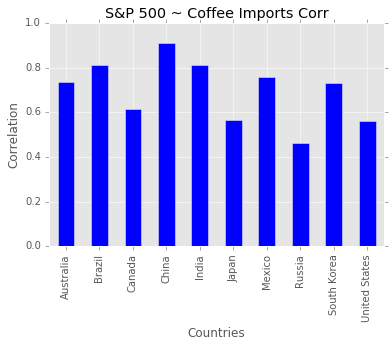

In [7]:
sp = pd.Series(new_coffee.corr()['Adjusted Close'])
sp = sp.drop('Adjusted Close')

sp.plot(kind='bar')
plt.title('S&P 500 ~ Coffee Imports Corr')
plt.ylabel('Correlation')
plt.xlabel('Countries')

I would say that a positive correlation seems reasonable, but the degree of correlation is questionable. Hope you enjoyed my analysis using the Quandl package.